#AML Project

##Group 10



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/Oversampled_X_train.csv')
x_train.head(10)

,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_access_files,is_guest_login,...,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S1,flag_S2,flag_S3,flag_SH
0,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.089692,0.37035,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/Oversampled_y_train.csv')
y_train.head(10)

,attack
0,Dos
1,normal
2,Probe
3,normal
4,normal
5,Dos
6,Dos
7,normal
8,normal
9,normal


In [ ]:
x_test = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/y_test.csv')

In [ ]:
x_val = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/y_val.csv')

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269365 entries, 0 to 269364
Data columns (total 100 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   wrong_fragment               269365 non-null  float64
 1   hot                          269365 non-null  float64
 2   num_failed_logins            269365 non-null  float64
 3   logged_in                    269365 non-null  int64  
 4   num_compromised              269365 non-null  float64
 5   root_shell                   269365 non-null  int64  
 6   su_attempted                 269365 non-null  float64
 7   num_file_creations           269365 non-null  float64
 8   num_access_files             269365 non-null  float64
 9   is_guest_login               269365 non-null  int64  
 10  diff_srv_rate                269365 non-null  float64
 11  srv_diff_host_rate           269365 non-null  float64
 12  dst_host_count               269365 non-null  float64
 13

##XGBoost

In [ ]:
y_train = y_train['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})
y_test = y_test['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})
y_val = y_val['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})

In [ ]:


xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, verbose=2)

start_time = time.time()

grid_search.fit(x_train, y_train)

end_time = time.time()
time_taken = end_time - start_time

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Time taken for model selection (GridSearchCV): {time_taken:.2f} seconds")

best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(x_test)
y_pred_train = best_model_xgb.predict(x_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  33.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  28.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  30.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time= 1.0min
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=  57.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=  57.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  32.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  38.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  31.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time= 1.1min
[CV] END ................learning_rate=0.1, n_estimators=200; total time= 1.0min
[CV] END ................learning_rate=0.1, n_est

In [ ]:
report_test=classification_report(y_test, y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7459
           1       0.80      0.77      0.79      2421
           2       0.94      0.26      0.41      2885
           3       0.35      0.48      0.40        67
           4       0.72      0.97      0.83      9711

    accuracy                           0.81     22543
   macro avg       0.76      0.66      0.66     22543
weighted avg       0.84      0.81      0.79     22543



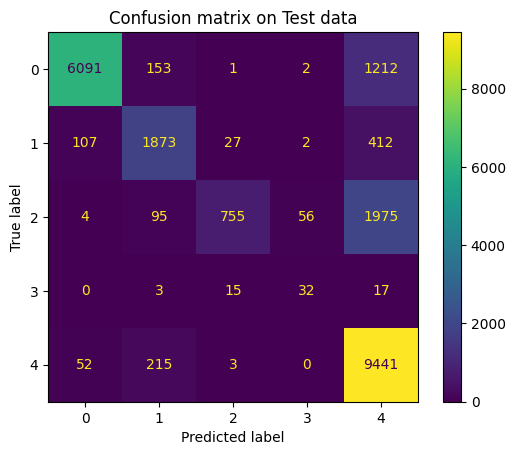

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model_xgb.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

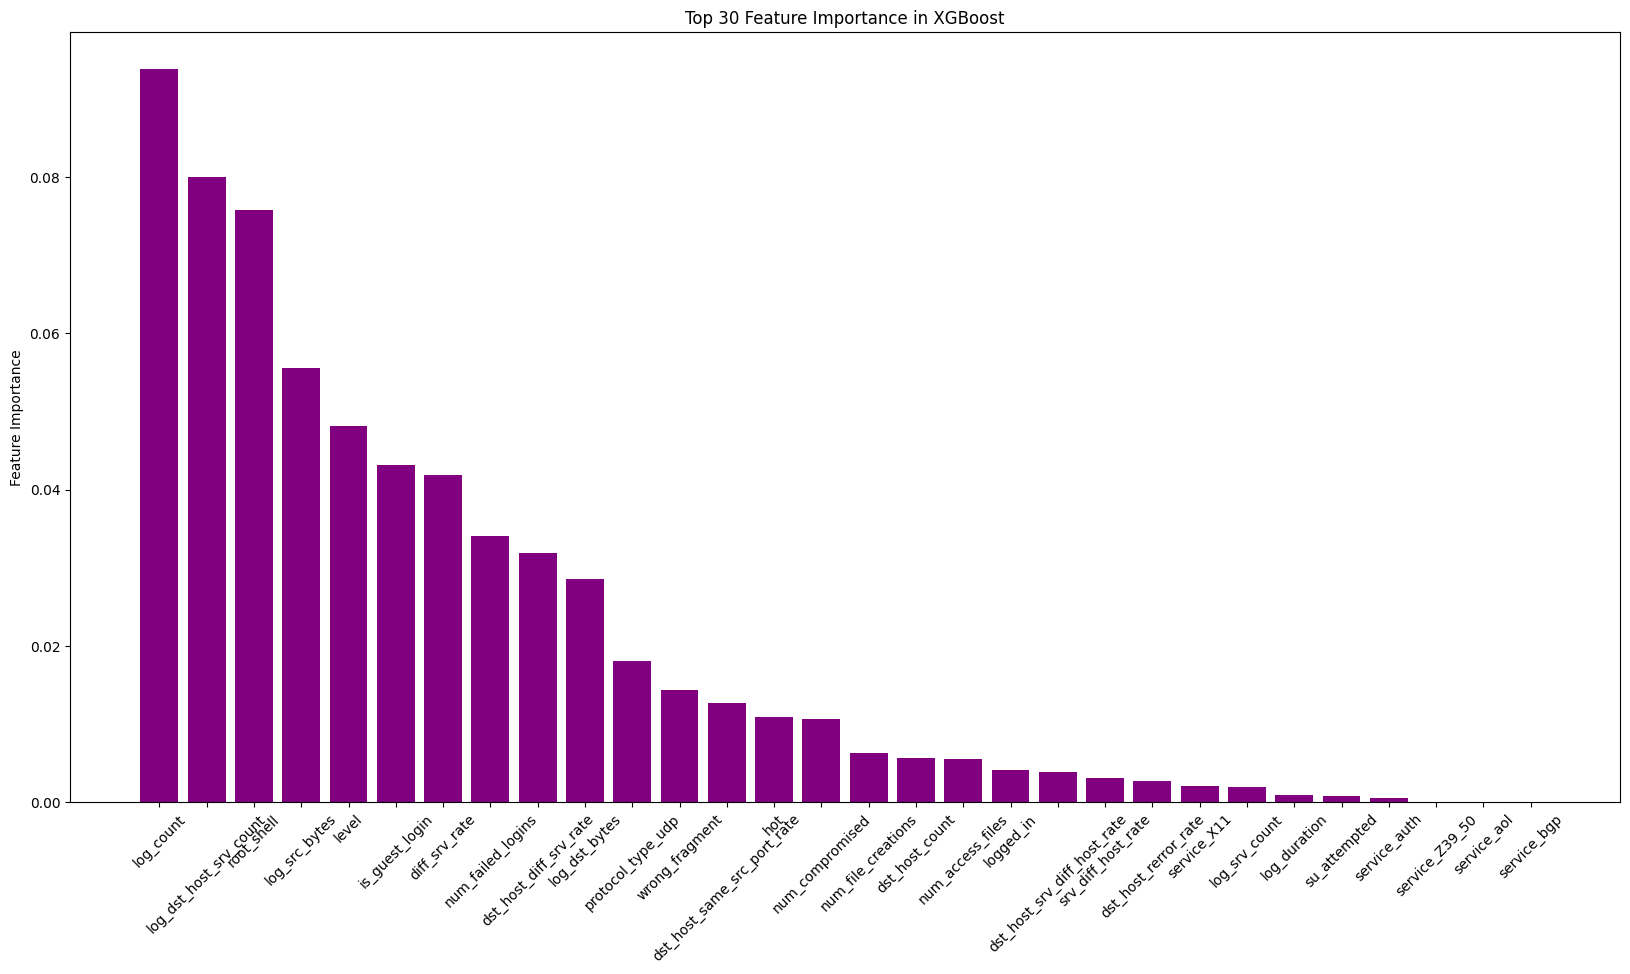

In [ ]:


importances = best_model_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': best_model_xgb.feature_names_in_[:30],
    'Importance': importances[:30]
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(20, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='purple', align='center')
plt.xticks(importance_df['Feature'], rotation=45)
plt.ylabel("Feature Importance")
plt.title('Top 30 Feature Importance in XGBoost')
plt.show()